# Challenge Set 1:  MTA Turnstile Data

Topic:        Challenge Set 1 <br>
Subject:      Explore MTA turnstile data <br>
Date:         01/14/2017 <br>
Name:         Brian Kim <br>
Worked with:  Jeremy Brown, Laura Chen, Chris Giler <br>
    


In [262]:
import pandas as pd
from __future__ import print_function, division
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline



#### Exercise 1.1


In [316]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        # concat our week onto url.. 
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170311, 170318, 170325]
turnstiles_df = get_data(week_nums)

In [264]:
# We can drop our index if we chose to.

#turnstiles_df=turnstiles_df.reset_index()
#turnstiles_df=turnstiles_df.drop('index',1)
#turnstiles_df.tail()

In [265]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [266]:
# major space issue on exits
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [267]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [268]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,03:00:00,REGULAR,6074048,2059555
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,07:00:00,REGULAR,6074062,2059569
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,11:00:00,REGULAR,6074163,2059664
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,15:00:00,REGULAR,6074458,2059735
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,19:00:00,REGULAR,6074874,2059807


In [269]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

03/04/2017    28042
03/05/2017    28122
03/06/2017    28123
03/07/2017    28049
03/08/2017    28096
03/09/2017    27958
03/10/2017    28263
03/11/2017    28020
03/12/2017    25471
03/13/2017    28185
03/14/2017    27949
03/15/2017    28184
03/16/2017    28055
03/17/2017    27865
03/18/2017    28026
03/19/2017    28020
03/20/2017    28175
03/21/2017    28083
03/22/2017    27992
03/23/2017    28231
03/24/2017    28190
Name: DATE, dtype: int64


#### Exercise 1.2


In [317]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [318]:
from datetime import datetime as dt

In [319]:
# develop filter, .. 
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,03:00:00,REGULAR,6074048,2059555
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,07:00:00,REGULAR,6074062,2059569
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,11:00:00,REGULAR,6074163,2059664
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,15:00:00,REGULAR,6074458,2059735
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,19:00:00,REGULAR,6074874,2059807


In [320]:
# Convert date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " +turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [321]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,03:00:00,REGULAR,6074048,2059555,2017-03-04 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,07:00:00,REGULAR,6074062,2059569,2017-03-04 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,11:00:00,REGULAR,6074163,2059664,2017-03-04 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,15:00:00,REGULAR,6074458,2059735,2017-03-04 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2017,19:00:00,REGULAR,6074874,2059807,2017-03-04 19:00:00


In [322]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
190305,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,03/04/2017,03:00:00,REGULAR,12635998,2810511,2017-03-04 03:00:00
190306,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,03/04/2017,07:00:00,REGULAR,12636112,2810520,2017-03-04 07:00:00
190307,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,03/04/2017,11:00:00,REGULAR,12636612,2810567,2017-03-04 11:00:00
190308,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,03/04/2017,15:00:00,REGULAR,12637018,2810712,2017-03-04 15:00:00
190309,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,03/04/2017,19:00:00,REGULAR,12637378,2810870,2017-03-04 19:00:00


In [323]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
399530,R158,R084,00-06-00,59 ST COLUMBUS,2017-03-05 03:00:00,2
507581,R408,R449,00-00-00,E 149 ST,2017-03-10 08:00:00,2
121361,N002A,R173,00-00-00,INWOOD-207 ST,2017-03-23 05:00:00,2
367030,R101,R001,02-00-06,SOUTH FERRY,2017-03-24 05:00:00,2
507835,R408,R449,00-00-02,E 149 ST,2017-03-10 08:00:00,2


In [324]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
# get datetime properties ~ .dt
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [325]:
turnstiles_df.DESC.value_counts()

REGULAR       581094
RECOVR AUD      6005
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [326]:

turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
# Get rid of the duplicate entry, be default we'll keep first entry
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [327]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2017-03-04 03:00:00,1
391396,R143,R032,02-03-00,TIMES SQ-42 ST,2017-03-24 20:00:00,1
391390,R143,R032,02-03-00,TIMES SQ-42 ST,2017-03-23 20:00:00,1
391391,R143,R032,02-03-00,TIMES SQ-42 ST,2017-03-24 00:00:00,1
391392,R143,R032,02-03-00,TIMES SQ-42 ST,2017-03-24 04:00:00,1


* No more duplicate Entries

In [328]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
196716,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/24/2017,21:00:00,5554,294,2017-03-24 21:00:00
196715,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/24/2017,17:00:00,5554,294,2017-03-24 17:00:00
196714,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/24/2017,13:00:00,5554,294,2017-03-24 13:00:00
196713,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/24/2017,09:00:00,5554,294,2017-03-24 09:00:00
196712,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/24/2017,05:00:00,5554,294,2017-03-24 05:00:00


#### Exercise 1.3



In [329]:
# returns a series
turnstiles_daily = turnstiles_df.groupby\
                (["C/A", "UNIT", "SCP", "STATION", "DATE"])\
                .ENTRIES.first().reset_index()
        
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,03/04/2017,6075172
1,A002,R051,02-00-00,59 ST,03/05/2017,6076001
2,A002,R051,02-00-00,59 ST,03/06/2017,6077531
3,A002,R051,02-00-00,59 ST,03/07/2017,6079199
4,A002,R051,02-00-00,59 ST,03/08/2017,6080809


In [330]:
# define two new columns using 
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [331]:
# define two new columns using 
#turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       #.groupby(["C/A", "UNIT", "SCP", "STATION"])
                                                       #["DATE", "ENTRIES"]
                                                       #.shift())
                                                    

In [332]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,03/04/2017,6075172,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/05/2017,6076001,03/04/2017,6075172.0
2,A002,R051,02-00-00,59 ST,03/06/2017,6077531,03/05/2017,6076001.0
3,A002,R051,02-00-00,59 ST,03/07/2017,6079199,03/06/2017,6077531.0
4,A002,R051,02-00-00,59 ST,03/08/2017,6080809,03/07/2017,6079199.0


In [333]:
# Drop rows for first date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [334]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,03/05/2017,6076001,03/04/2017,6075172.0
2,A002,R051,02-00-00,59 ST,03/06/2017,6077531,03/05/2017,6076001.0
3,A002,R051,02-00-00,59 ST,03/07/2017,6079199,03/06/2017,6077531.0
4,A002,R051,02-00-00,59 ST,03/08/2017,6080809,03/07/2017,6079199.0
5,A002,R051,02-00-00,59 ST,03/09/2017,6082520,03/08/2017,6080809.0


In [335]:
# sanity check : when are previous entries greater than current ? 
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
714,A011,R080,01-00-00,57 ST-7 AV,03/05/2017,887177814,03/04/2017,887179488.0
715,A011,R080,01-00-00,57 ST-7 AV,03/06/2017,887174509,03/05/2017,887177814.0
716,A011,R080,01-00-00,57 ST-7 AV,03/07/2017,887171775,03/06/2017,887174509.0
717,A011,R080,01-00-00,57 ST-7 AV,03/08/2017,887168537,03/07/2017,887171775.0
718,A011,R080,01-00-00,57 ST-7 AV,03/09/2017,887165061,03/08/2017,887168537.0


In [336]:
# What's the deal with counter going in reverse ? 
# investigate this with turnstiles_df
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_df[mask].head()

# entries going up, datetime going down

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME


* Counter working in Reverse??? - WHHHAT

In [337]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

# size vs count? 
# size includes NaN values, count does not 

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         20
A025   R023  01-03-01  34 ST-HERALD SQ    20
             01-03-02  34 ST-HERALD SQ    20
A034   R170  03-00-01  14 ST-UNION SQ      1
A049   R088  02-05-00  CORTLANDT ST       14
A066   R118  00-00-00  CANAL ST           20
B032   R264  00-00-00  OCEAN PKWY          1
C019   R232  00-00-02  45 ST              20
H003   R163  01-00-02  6 AV               20
H023   R236  00-06-00  DEKALB AV          20
J009   R378  00-00-01  MYRTLE AV           1
J020   R433  00-00-01  ALABAMA AV          1
J034   R007  00-00-02  104 ST             20
K026   R100  00-00-01  METROPOLITAN AV    18
N063A  R011  00-00-04  42 ST-PORT AUTH    20
             00-00-05  42 ST-PORT AUTH    20
             00-00-08  42 ST-PORT AUTH    20
N067   R012  00-03-03  34 ST-PENN STA      1
N078   R175  01-03-00  14 ST              20
N095   R014  00-03-07  FULTON ST           1
             00-03-08  FULTON ST           1
N095A  R014  01-

In [338]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        # see how large these values get..
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1866 10201425.0
285016031 419273605.0
1103 7011426.0
1937 2945098.0
2083 3316604.0
3249 1713154.0
3257 10051710.0
533 12166448.0
76 1207687.0
90 3440761.0
828 3834191.0
1044 1402333.0
3370113 103217105.0
67109884 3369937.0
67108947 103214872.0
103219486 67108947.0
127 67109547.0
2246 1028654.0
84110511 3409570.0
3410482 84109915.0
16779087 70693.0
853 1855093.0
117440514 76.0
1923044 13404511.0
0 1923044.0
3237649 17882744.0
2 3237649.0
1792 28533742.0
4499664 1792.0
19631 32611926.0
1923044 13402384.0
3237649 17879878.0
1792 28529236.0
13404729 1765134.0
17883120 13945905.0
28534459 8313479.0
1969278 3481634.0
32611926 10322474.0
692 2780905.0
2480 6630213.0


In [339]:
# slightly different approach
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"],row['C/A'],row['UNIT'],
             row['SCP'],row['STATION'])
        # assumption is that 
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1866 10201425.0 A034 R170 03-00-01 14 ST-UNION SQ
285016031 419273605.0 C019 R232 00-00-02 45 ST
1103 7011426.0 J009 R378 00-00-01 MYRTLE AV
1937 2945098.0 J020 R433 00-00-01 ALABAMA AV
2083 3316604.0 N067 R012 00-03-03 34 ST-PENN STA
3249 1713154.0 N095 R014 00-03-07 FULTON ST
3257 10051710.0 N095 R014 00-03-08 FULTON ST
533 12166448.0 N095A R014 01-03-00 FULTON ST
76 1207687.0 N208 R443 01-00-00 170 ST
90 3440761.0 N225 R157 01-00-02 NORWOOD 205 ST
828 3834191.0 N324 R018 00-03-04 JKSN HT-ROOSVLT
1044 1402333.0 N325A R218 00-03-00 ELMHURST AV
3370113 103217105.0 N334B R341 00-05-00 75 AV
67109884 3369937.0 N334B R341 00-05-01 75 AV
67108947 103214872.0 N334B R341 00-06-00 75 AV
103219486 67108947.0 N334B R341 00-06-00 75 AV
127 67109547.0 N334B R341 00-06-01 75 AV
2246 1028654.0 N340 R115 00-00-02 169 ST
84110511 3409570.0 N501 R020 01-06-00 47-50 STS ROCK
3410482 84109915.0 N501 R020 01-06-01 47-50 STS ROCK
16779087 70693.0 N700A R570 01-00-03 72 ST-2 AVE
853 1855093.0 R138 R293 00-

In [340]:
# Daily_Entries
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/05/2017,6076001,03/04/2017,6075172.0,829.0
2,A002,R051,02-00-00,59 ST,03/06/2017,6077531,03/05/2017,6076001.0,1530.0
3,A002,R051,02-00-00,59 ST,03/07/2017,6079199,03/06/2017,6077531.0,1668.0
4,A002,R051,02-00-00,59 ST,03/08/2017,6080809,03/07/2017,6079199.0,1610.0
5,A002,R051,02-00-00,59 ST,03/09/2017,6082520,03/08/2017,6080809.0,1711.0


In [341]:
# Verify that we got same results via the non-pandas version.

#### Challenge 1.4 - Plot Time Series 

In [295]:

df =turnstiles_daily
dates = df.DATE
counts = df.DAILY_ENTRIES

Text(0.5,1,'Entries by DATE')

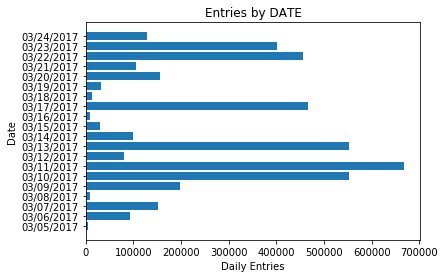

In [296]:
plt.barh(dates,counts )

plt.xlabel('Daily Entries')
plt.ylabel('Date')
plt.title('Entries by DATE')

In [297]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['day_of_week'] = df['DATE'].dt.weekday_name

#### Challenge 1.5

In [342]:

df.groupby(['C/A', 'UNIT', 'STATION', 'SCP'])[['DAILY_ENTRIES']].sum().head(10)



DAILY_ENTRIES
C/A  UNIT STATION SCP                    
A002 R051 59 ST   02-00-00        32952.0
                  02-00-01         8995.0
                  02-03-00        11296.0
                  02-03-01        23104.0
                  02-03-02        24370.0
                  02-03-03        22218.0
                  02-03-04        25207.0
                  02-03-05        38641.0
                  02-03-06        30688.0
                  02-05-00            8.0

#### CHALLENGE 1.6

In [445]:

#Similarly, combine everything in each station, 
##and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, 
##by adding up all the turnstiles in a station.



df_f = df
df_f

df_f = df_f[ (df_f['STATION'] == "FLUSHING-MAIN")]



In [447]:

#Challenge 1.7
#Plot the time series for a station.

#In this case, Flushing-Main Street Station was chosen. 

df_f = df


df_f = df_f[ (df_f['STATION'] == "FLUSHING-MAIN")]




df_f.head(10)


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,day_of_week
91801,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-05,8016677,03/04/2017,8015657.0,1020.0,Sunday
91802,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-06,8018880,03/05/2017,8016677.0,2203.0,Monday
91803,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-07,8020833,03/06/2017,8018880.0,1953.0,Tuesday
91804,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-08,8022879,03/07/2017,8020833.0,2046.0,Wednesday
91805,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-09,8024926,03/08/2017,8022879.0,2047.0,Thursday
91806,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-10,8026776,03/09/2017,8024926.0,1850.0,Friday
91807,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-11,8028057,03/10/2017,8026776.0,1281.0,Saturday
91808,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-12,8028890,03/11/2017,8028057.0,833.0,Sunday
91809,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-13,8030677,03/12/2017,8028890.0,1787.0,Monday
91810,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-14,8030913,03/13/2017,8030677.0,236.0,Tuesday


#### Challenge 1.7
#### Plot the time series for a station

Text(-14.375,0.5,'Entries')

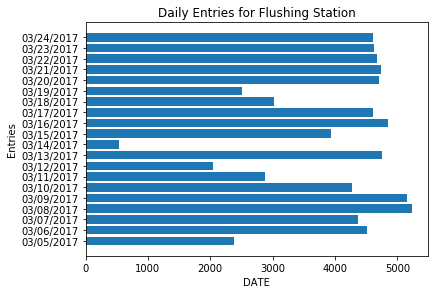

In [360]:
dates = df_f.DATE
counts = df_f.DAILY_ENTRIES
plt.barh(dates,counts)
plt.title('Daily Entries for Flushing Station')
plt.tight_layout()
plt.xlabel('DATE')
plt.ylabel('Entries')

#### Challenge 1.8

In [363]:
df_f.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
DATE,,,,,,,,,
03/05/2017,R533,R055,00-00-00,FLUSHING-MAIN,03/05/2017,8016677,03/04/2017,8015657.0,1020.0
03/06/2017,R533,R055,00-00-00,FLUSHING-MAIN,03/06/2017,8018880,03/05/2017,8016677.0,2203.0
03/07/2017,R533,R055,00-00-00,FLUSHING-MAIN,03/07/2017,8020833,03/06/2017,8018880.0,1953.0
03/08/2017,R533,R055,00-00-00,FLUSHING-MAIN,03/08/2017,8022879,03/07/2017,8020833.0,2046.0
03/09/2017,R533,R055,00-00-00,FLUSHING-MAIN,03/09/2017,8024926,03/08/2017,8022879.0,2047.0
03/10/2017,R533,R055,00-00-00,FLUSHING-MAIN,03/10/2017,8026776,03/09/2017,8024926.0,1850.0
03/11/2017,R533,R055,00-00-00,FLUSHING-MAIN,03/11/2017,8028057,03/10/2017,8026776.0,1281.0
03/12/2017,R533,R055,00-00-00,FLUSHING-MAIN,03/12/2017,8028890,03/11/2017,8028057.0,833.0
03/13/2017,R533,R055,00-00-00,FLUSHING-MAIN,03/13/2017,8030677,03/12/2017,8028890.0,1787.0


In [448]:
df_f = df

df_f = df_f[ (df_f['STATION'] == "FLUSHING-MAIN")]

df_f['DATE'] = pd.to_datetime(df_f['DATE'])  
#df_f= df_f.set_index(df_f["DATE"],inplace=True)

df_f.head()
#df_f_w= df_f['DAILY_ENTRIES'].resample('W').sum()
#df = df.set_index(['date'])


C:\Users\sproc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,day_of_week
91801,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-05,8016677,03/04/2017,8015657.0,1020.0,Sunday
91802,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-06,8018880,03/05/2017,8016677.0,2203.0,Monday
91803,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-07,8020833,03/06/2017,8018880.0,1953.0,Tuesday
91804,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-08,8022879,03/07/2017,8020833.0,2046.0,Wednesday
91805,R533,R055,00-00-00,FLUSHING-MAIN,2017-03-09,8024926,03/08/2017,8022879.0,2047.0,Thursday


In [449]:
df_f.dtypes

C/A                      object
UNIT                     object
SCP                      object
STATION                  object
DATE             datetime64[ns]
ENTRIES                   int64
PREV_DATE                object
PREV_ENTRIES            float64
DAILY_ENTRIES           float64
day_of_week              object
dtype: object

In [450]:
df_f = df_f.set_index(['DATE'])


In [451]:
df_f.dtypes
print(df_f.loc['2017-3-5' : '2017-3-11'])

             C/A  UNIT       SCP        STATION   ENTRIES   PREV_DATE  \
DATE                                                                    
2017-03-05  R533  R055  00-00-00  FLUSHING-MAIN   8016677  03/04/2017   
2017-03-06  R533  R055  00-00-00  FLUSHING-MAIN   8018880  03/05/2017   
2017-03-07  R533  R055  00-00-00  FLUSHING-MAIN   8020833  03/06/2017   
2017-03-08  R533  R055  00-00-00  FLUSHING-MAIN   8022879  03/07/2017   
2017-03-09  R533  R055  00-00-00  FLUSHING-MAIN   8024926  03/08/2017   
2017-03-10  R533  R055  00-00-00  FLUSHING-MAIN   8026776  03/09/2017   
2017-03-11  R533  R055  00-00-00  FLUSHING-MAIN   8028057  03/10/2017   
2017-03-05  R533  R055  00-00-01  FLUSHING-MAIN   7714246  03/04/2017   
2017-03-06  R533  R055  00-00-01  FLUSHING-MAIN   7715778  03/05/2017   
2017-03-07  R533  R055  00-00-01  FLUSHING-MAIN   7717208  03/06/2017   
2017-03-08  R533  R055  00-00-01  FLUSHING-MAIN   7718795  03/07/2017   
2017-03-09  R533  R055  00-00-01  FLUSHING-MAIN   7

In [452]:
df_f.head()

,C/A,UNIT,SCP,STATION,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,day_of_week
DATE,,,,,,,,,
2017-03-05,R533,R055,00-00-00,FLUSHING-MAIN,8016677,03/04/2017,8015657.0,1020.0,Sunday
2017-03-06,R533,R055,00-00-00,FLUSHING-MAIN,8018880,03/05/2017,8016677.0,2203.0,Monday
2017-03-07,R533,R055,00-00-00,FLUSHING-MAIN,8020833,03/06/2017,8018880.0,1953.0,Tuesday
2017-03-08,R533,R055,00-00-00,FLUSHING-MAIN,8022879,03/07/2017,8020833.0,2046.0,Wednesday
2017-03-09,R533,R055,00-00-00,FLUSHING-MAIN,8024926,03/08/2017,8022879.0,2047.0,Thursday


In [453]:

#get date range 
df_f_wk1 = df_f.loc['2017-3-5' : '2017-3-11']
df_f_wk2 = df_f.loc['2017-3-12' : '2017-3-18']
df_f_wk3 = df_f.loc['2017-3-19' : '2017-3-25']



Text(0.5,1,'Flushing Station Entries: March 5-11 2017')

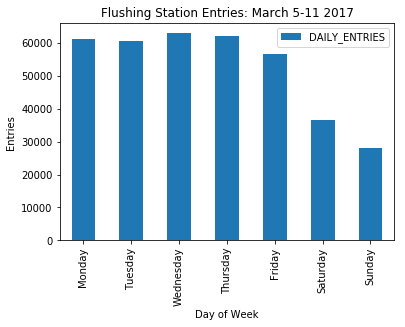

In [455]:
df_f_wk1 = df_f_wk1.groupby(['day_of_week'],as_index=False)[["DAILY_ENTRIES"]].sum()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_f_wk1= df_f_wk1.groupby(['day_of_week']).sum().reindex(cats) 
df_f_wk1.plot(kind= 'bar')

plt.xlabel('Day of Week')
plt.ylabel('Entries ')
plt.title('Flushing Station Entries: March 5-11 2017')

Text(0.5,1,'Flushing Station Entries: March 12-18 2017')

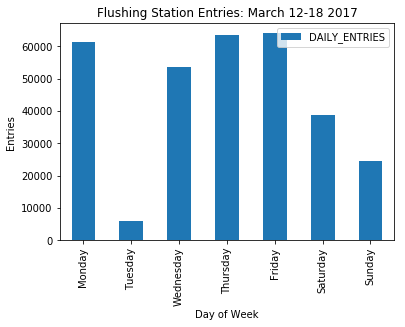

In [456]:
df_f_wk2 = df_f_wk2.groupby(['day_of_week'],as_index=False)[["DAILY_ENTRIES"]].sum()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_f_wk2= df_f_wk2.groupby(['day_of_week']).sum().reindex(cats) 
df_f_wk2.plot(kind= 'bar')

plt.xlabel('Day of Week')
plt.ylabel('Entries ')
plt.title('Flushing Station Entries: March 12-18 2017')

Text(0.5,1,'Flushing Station Entries: March 19-25 2017')

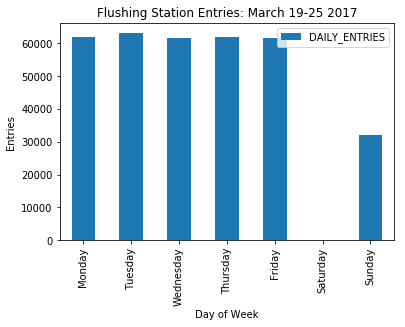

In [457]:
df_f_wk3 = df_f_wk3.groupby(['day_of_week'],as_index=False)[["DAILY_ENTRIES"]].sum()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_f_wk3= df_f_wk3.groupby(['day_of_week']).sum().reindex(cats) 
df_f_wk3.plot(kind= 'bar')

plt.xlabel('Day of Week')
plt.ylabel('Entries ')
plt.title('Flushing Station Entries: March 19-25 2017')

#### Challenge 1.9


In [463]:
##top 50 stations
#sum of total ridership 
df9=df.groupby(['STATION'])[["ENTRIES"]].sum().sort_values("ENTRIES", ascending =False).head(50)

df9.head()

,ENTRIES
STATION,
42 ST-PORT AUTH,151942575046
125 ST,137054470014
23 ST,132517555517
CANAL ST,119628410756
TIMES SQ-42 ST,114790705934


Text(0.5,1,'Total Ridership Counts (Top 50 Stations)')

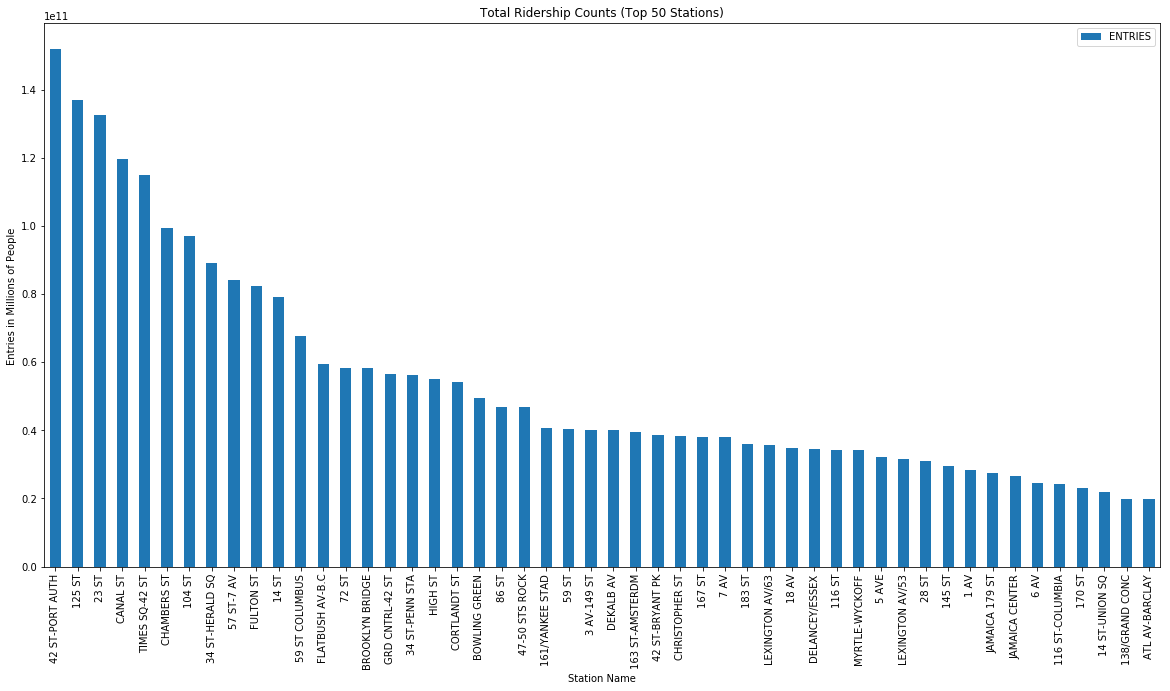

In [465]:
df9.plot(kind = 'bar',figsize=(20,10))
#plt.t(df9)
plt.xlabel('Station Name')
plt.ylabel('Entries in Millions of People ')
plt.title('Total Ridership Counts (Top 50 Stations)')